In [0]:
import pandas as pd
import os
from google.colab import drive
from os import listdir
from os.path import isfile, join
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dir = '/content/drive/My Drive/Colab Notebooks/'
image_dir = dir + 'stage_1_test_images'

data = pd.read_csv(dir + 'tuning_labels.csv', header=None)

data[0] = data.iloc[:,0]+'.jpg'
data[1] = pd.Series(map(lambda x: x.split(), data.iloc[:,1]))
print(data)

                                0                                            1
0    2b2f44594449326f4e52553d.jpg                       [/m/06ts_6, /m/01g317]
1    2b333057383432514454593d.jpg  [/m/01g317, /m/06ts_6, /m/01jpn4, /m/0dnkv]
2    2b38364476612f6c4558383d.jpg                        [/m/01g317, /m/05zp8]
3    2b4270756237642b7456453d.jpg     [/m/0jjw, /m/015r61, /m/02csf, /m/05qdh]
4    2b4534307571444f412b4d3d.jpg                                   [/m/099fz]
..                            ...                                          ...
995  7a652f354f56304578364d3d.jpg              [/m/05s2s, /m/083vt, /m/03ljvf]
996  7a696a5a36356261572b6f3d.jpg                        [/m/0jyfg, /m/017ftj]
997  7a704375527150436248733d.jpg                                   [/m/07j7r]
998  7a752b505835372b496e633d.jpg                       [/m/012qyb, /m/01g317]
999  7a767a496f6175625649633d.jpg                [/m/0jjw, /m/02csf, /m/05qdh]

[1000 rows x 2 columns]


In [0]:
from collections import defaultdict

labels = []
for i in data.iloc[:, 1]:
    labels.extend(i)

label_data = pd.DataFrame(labels)

#label_dict = defaultdict(int)
for l in labels:
    label_dict[l] += 1

labels = list(set(labels))
print(labels)
print(len(labels))
print(label_data)

['/m/0jbk', '/m/06ts_6', '/m/05229', '/m/05zdp', '/m/03ty65', '/m/049h0m', '/m/01yrx', '/m/0cz_0', '/m/0j_s4', '/m/09bgkl', '/m/0180xr', '/m/0fmnf5', '/m/079cl', '/m/013s93', '/m/0dlk0vw', '/m/0sx_x', '/m/01nz0z', '/m/04fyb1', '/m/0mcqy', '/m/0bt_c3', '/m/0fg019', '/m/0pvlz', '/m/0hr1s_w', '/m/0k5j', '/m/04v6l4', '/m/0dqb5', '/m/09x3lm', '/m/03nfmq', '/m/0blz9', '/m/044l90', '/m/03pty', '/m/05hg54', '/m/0crtnw', '/m/0bmz2', '/m/02_vjy', '/m/0jyfg', '/m/015c4z', '/m/026t6', '/m/0gjkl', '/m/083mg', '/m/025sfw', '/m/03z1rt', '/m/0d4v4', '/m/04h8sr', '/m/0335j', '/m/02rcwpb', '/m/0cvnqh', '/m/04c41_', '/m/02c3nd', '/m/0692dn', '/m/015z8s', '/m/020fb2', '/m/03p2h9', '/m/01fklc', '/m/044_87', '/m/063w2', '/m/02hnl', '/m/04h4w', '/m/0583c6', '/m/02k_k3t', '/m/0kmg4', '/m/02054x', '/m/0zvk5', '/m/0_ch6', '/m/0b_rs', '/m/0hhdb', '/m/01n32', '/m/01vk9q', '/m/09j5n', '/m/01f43', '/m/025dyy', '/m/021s_r', '/m/06d_3', '/m/06m11', '/m/014v7p', '/m/04rd7', '/m/01c7cq', '/m/018dz0', '/m/06fvc', '/m/09

/m/01g317    325
/m/05s2s     122
/m/07j7r     109
/m/01c8br     63
/m/083vt      57
/m/0199g      52
/m/02csf      48
/m/05wrt      47
/m/0jjw       45
/m/0jyfg      42
Name: 0, dtype: int64
265


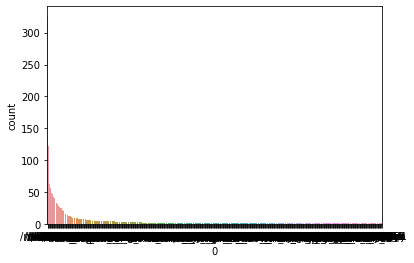

In [0]:
import seaborn as sns

print(label_data[0].value_counts()[:10])
print(sum(label_data[0].value_counts() == 1))

a = sns.countplot(x=0, data=label_data, order = label_data[0].value_counts().index)

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
train_input = train.iloc[:,0]
test_input = test.iloc[:,0]
train_labels = train.iloc[:,1:]
test_labels = test.iloc[:,1:]

print(train_labels)

labels = []
for i, r in train_labels.iterrows():
  labels.extend(r[1])
labels = list(set(labels))
print(len(labels))

#train, valid = train_test_split(train, test_size=0.1)

                                                 1
0                   [/m/05s2s, /m/0mcn4, /m/083vt]
1                 [/m/02csf, /m/01g317, /m/07glzq]
2                   [/m/05zdp, /m/07bsy, /m/07j7r]
3                  [/m/0jjw, /m/01c8br, /m/07vwy6]
4                            [/m/07glzq, /m/02csf]
..                                             ...
795                                     [/m/09j2d]
796                          [/m/0191_7, /m/0hhdb]
797                 [/m/083vt, /m/07j7r, /m/05s2s]
798  [/m/0263lr1, /m/0brn2d, /m/0ckljz, /m/02n7rn]
799                                     [/m/05qdh]

[800 rows x 1 columns]
424


In [0]:
print(labels)

['/m/0jbk', '/m/06ts_6', '/m/05zdp', '/m/03ty65', '/m/049h0m', '/m/01yrx', '/m/0cz_0', '/m/0j_s4', '/m/09bgkl', '/m/0180xr', '/m/0fmnf5', '/m/079cl', '/m/013s93', '/m/0dlk0vw', '/m/0sx_x', '/m/01nz0z', '/m/04fyb1', '/m/0mcqy', '/m/0fg019', '/m/0pvlz', '/m/0hr1s_w', '/m/0k5j', '/m/0dqb5', '/m/09x3lm', '/m/03nfmq', '/m/0blz9', '/m/044l90', '/m/03pty', '/m/05hg54', '/m/0crtnw', '/m/02_vjy', '/m/0jyfg', '/m/015c4z', '/m/026t6', '/m/083mg', '/m/025sfw', '/m/03z1rt', '/m/0d4v4', '/m/0335j', '/m/02rcwpb', '/m/0cvnqh', '/m/04c41_', '/m/02c3nd', '/m/0692dn', '/m/015z8s', '/m/020fb2', '/m/03p2h9', '/m/01fklc', '/m/044_87', '/m/02hnl', '/m/04h4w', '/m/0583c6', '/m/02k_k3t', '/m/02054x', '/m/0zvk5', '/m/0_ch6', '/m/0b_rs', '/m/0hhdb', '/m/01n32', '/m/01vk9q', '/m/09j5n', '/m/01f43', '/m/06d_3', '/m/021s_r', '/m/025dyy', '/m/06m11', '/m/014v7p', '/m/04rd7', '/m/01c7cq', '/m/018dz0', '/m/06fvc', '/m/09p3jz', '/m/0195fx', '/m/09ct_', '/m/018vs', '/m/01mzpv', '/m/015x4r', '/m/03q5c7', '/m/03hh2k', '/m

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split=0.2)

train_generator = data_generator.flow_from_dataframe( dataframe=train,
                                                      directory=image_dir,
                                                      x_col=0,
                                                      y_col=1,
                                                      subset="training",
                                                      shuffle=True,
                                                      class_mode="categorical",
                                                      target_size=(128,128),
                                                      classes=labels,
                                                      batch_size=32)
                                                      
valid_generator = data_generator.flow_from_dataframe( dataframe=train,
                                                      directory=image_dir,
                                                      x_col=0,
                                                      y_col=1,
                                                      subset="validation",
                                                      shuffle=True,
                                                      class_mode="categorical",
                                                      target_size=(128,128),
                                                      classes=labels,
                                                      batch_size=32)

test_datagen=ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,)

test_generator = test_datagen.flow_from_dataframe( dataframe=test,
                                                      directory=image_dir,
                                                      x_col=0,
                                                      y_col=None,
                                                      shuffle=False,
                                                      class_mode=None,
                                                      target_size=(128,128),
                                                      batch_size=32)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 12 invalid image filename(s) in x_col="0". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 631 validated image filenames belonging to 424 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 7 invalid image filename(s) in x_col="0". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 158 validated image filenames belonging to 424 classes.
Found 200 validated image filenames.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from keras import optimizers

classifier = Sequential()
#classifier.add(Conv2D(32, (3, 3), padding='same',
#                              input_shape=(128,128,3)))
classifier.add(Conv2D(filters = 56,kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
#classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(128, (3, 3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(128, (3, 3), padding='same'))
classifier.add(Activation('relu'))
classifier.add(Conv2D(256, (3, 3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(2048))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))





#classifier.add(Conv2D(filters = 56,kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
#classifier.add(MaxPooling2D(pool_size = (2,2)))
#classifier.add(Conv2D(64,(3,3),activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2,2)))
#classifier.add(Flatten())
#######classifier.add(Dense(units = 500, activation = 'relu'))
classifier.add(Dense(units = len(labels) , activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['categorical_accuracy','accuracy'])
#classifier.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])
classifier.summary()

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
classifier.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=60
)
#classifier.fit(train_generator, epochs = 5, steps_per_epoch = 10 )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 56)      1568      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 56)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 128)       64640     
_________________________________________________________________
activation_4 (Activation)    (None, 61, 61, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 128)       147584    
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 128)      

KeyboardInterrupt: ignored

In [0]:

#ar = test.iloc[:2,:]
#print(ar)

#test_generator = data_generator.flow_from_dataframe( dataframe=ar,
#                                                      directory=image_dir,
#                                                      x_col=0,
#                                                      class_mode=None,
#                                                      target_size=(128,128),
#                                                      batch_size=1)




test_generator.reset()
pred=classifier.predict(test_generator, 
                        steps=STEP_SIZE_TEST,
                              verbose=1)

print(pred)

 #print(test_generator[0][0])
 #classifier.predict(test_generator[0])

6/6 [==============================] - 93s 15s/step
[[1.8221751e-03 2.1169067e-03 1.1304301e-05 ... 1.9733994e-03
  1.8941722e-05 4.5733042e-03]
 [6.6181348e-04 3.0372139e-06 1.0503170e-06 ... 8.1969651e-05
  3.6491650e-07 5.3524953e-05]
 [2.7711401e-04 9.3370130e-05 1.6756164e-06 ... 2.5820710e-02
  1.3736794e-06 7.1839389e-04]
 ...
 [7.4652417e-05 7.1655761e-04 5.2544883e-06 ... 6.8756817e-03
  5.2134637e-06 1.2608255e-03]
 [2.4599954e-02 5.7898066e-04 3.1855761e-05 ... 1.6151859e-03
  3.7635047e-05 1.2497558e-03]
 [7.8657571e-08 1.9725933e-07 1.7346891e-09 ... 9.5890078e-09
  1.2261318e-09 3.4586431e-09]]


In [0]:
pred_bool = (pred >0.5)
predictions=[]
new_labels = train_generator.class_indices
new_labels = dict((v,k) for k,v in new_labels.items())
for row in pred_bool:
  #print(row)
  l=[]
  for index,cls in enumerate(row):
      if cls:
          l.append(new_labels[index])
  predictions.append(",".join(l))
filenames=test_generator.filenames

#results.to_csv("results.csv",index=False)

In [0]:
test_act_labels = test[list(map(lambda x: x in filenames, test.iloc[:,0]))].reset_index(drop=True)[:len(predictions)].iloc[:,1]
test_act_labels = list(map(lambda x: list(set(x).intersection(labels)), test_act_labels))
results=pd.DataFrame({"Filename":filenames[:len(predictions)],
                      "Predictions":predictions,
                     "Actual":test_act_labels})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 300)
print(results)
#print(test[list(map(lambda x: x in filenames, test.iloc[:,0]))].reset_index(drop=True)[:len(predictions)].iloc[:,1])

                         Filename                  Predictions                                             Actual
0    6c424e514d784f596c46633d.jpg                                                                      [/m/04szw]
1    7341655374435864766d453d.jpg            /m/05s2s,/m/07j7r                     [/m/07j7r, /m/083vt, /m/05s2s]
2    2f6e366c623975374e614d3d.jpg                                                 [/m/0199g, /m/03p2h9, /m/09rgp]
3    31654d334c5865797151303d.jpg                                                            [/m/01f43, /m/05h0n]
4    48504b4d617471787772383d.jpg                    /m/01g317       [/m/01d74z, /m/01g317, /m/01c8br, /m/06ts_6]
5    6544773735567645444d6b3d.jpg                     /m/02sgy                     [/m/0jjw, /m/01g317, /m/034wh]
6    446b2f52344e47784671513d.jpg                     /m/05s2s                 [/m/0brn2d, /m/01vxzc, /m/0263lr1]
7    423032676b4f4a67444a383d.jpg                                                       

In [0]:


train = pd.read_csv(dir + 'tuning_labels.csv', nrows=1000)
        #print(train)
        #train = pd.read_csv(dir + 'train_machine_labels.csv', nrows=1000)
        #print(train)
        #train = pd.read_csv(dir + 'train_labels.csv', nrows=1000)
        #print(train)
train = pd.read_csv(dir + 'train_human_labels.csv', nrows=1000)
#print(train)
        #train = pd.read_csv(dir + 'train_bounding_boxes.csv', nrows=1000)
        #print(train)
        #train = pd.read_csv(dir + 'classes-trainable.csv', nrows=1000)
        #print(train)
label_descriptions = pd.read_csv(dir + 'class-descriptions.csv', nrows=1000)
train = pd.read_csv(dir + 'train-images-boxable-with-rotation.csv', nrows=5000)

print(train)